In [1]:
library(psych)
library(nFactors)

Loading required package: MASS
Loading required package: boot

Attaching package: ‘boot’

The following object is masked from ‘package:psych’:

    logit

Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:boot’:

    melanoma


Attaching package: ‘nFactors’

The following object is masked from ‘package:lattice’:

    parallel



The General Aptitude Test Battery (GATB) is an occupationally oriented multi-aptitude test that measures distinct aptitudes using 12 separate tests (8 pencil and paper tests, and 4 performance tests). The tests are supposed to capture people’s different abilities including the cognitive, perceptual, and psychomotor domains. In a study, the 12 GATB tests were administrated to 255 individuals, and the following is the sample covariance matrix of the
variables.

In [2]:
data = as.matrix(read.table('GATB.cov', fill=TRUE, col.names=paste("V", 1:12)))
data[upper.tri(data)] <- t(data)[upper.tri(data)]
data

V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9,V.10,V.11,V.12
1.02,0.30,0.66,0.34,0.79,0.25,0.70,0.26,0.34,0.35,0.39,0.35
0.30,1.01,0.37,0.58,0.47,0.76,0.41,0.20,0.30,0.25,0.32,0.33
0.66,0.37,1.00,0.53,0.55,0.47,0.58,0.25,0.28,0.28,0.36,0.23
0.34,0.58,0.53,1.03,0.43,0.62,0.44,0.17,0.21,0.21,0.27,0.28
0.79,0.47,0.55,0.43,1.02,0.37,0.53,0.24,0.29,0.34,0.36,0.27
0.25,0.76,0.47,0.62,0.37,1.00,0.40,0.21,0.30,0.23,0.21,0.31
0.70,0.41,0.58,0.44,0.53,0.40,1.03,0.39,0.32,0.40,0.44,0.43
0.26,0.20,0.25,0.17,0.24,0.21,0.39,1.04,0.49,0.54,0.44,0.42
0.34,0.30,0.28,0.21,0.29,0.30,0.32,0.49,1.01,0.77,0.47,0.45
0.35,0.25,0.28,0.21,0.34,0.23,0.40,0.54,0.77,1.04,0.48,0.48


V.1  = Name comparison (clerical perception)<br>
V.2  = Arithmetic reasoning (numerical aptitude)<br>
V.3  = Three dimensional space (spatial aptitude)<br>
V.4  = Vocabulary (verbal aptitude)<br>
V.5  = Tool matching (form perception)<br>
V.6  = Computational (numerical aptitude)<br>
V.7  = Shape matching (form perception)<br>
V.8  = Mark making (motor coordination)<br>
V.9  = Place (manual dexterity)<br>
V.10 = Turn (manual dexterity)<br>
V.11 = Assemble (finger dexterity)<br>
V.12 = Dissemble (finger dexterity)

In [3]:
nobs = 255 # the 12 GATB tests were administrated to 255 individuals
p = ncol(data) # number of tests
data = cov2cor(data) # convert cov matrix to cor matrix 
data

V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9,V.10,V.11,V.12
1.0000000,0.2955701,0.6534974,0.3317113,0.7745098,0.2475369,0.6829350,0.2524391,0.3349794,0.3398218,0.3804923,0.3448318
0.2955701,1.0000000,0.3681638,0.5686548,0.4630598,0.7562283,0.4019801,0.1951428,0.2970297,0.2439286,0.3137406,0.3267327
0.6534974,0.3681638,1.0000000,0.5222245,0.5445811,0.4700000,0.5714910,0.2451452,0.2786104,0.2745626,0.3547185,0.2288586
0.3317113,0.5686548,0.5222245,1.0000000,0.4195172,0.6109042,0.4271845,0.1642531,0.2058922,0.2029009,0.2621359,0.2745230
0.7745098,0.4630598,0.5445811,0.4195172,1.0000000,0.3663546,0.5170793,0.2330207,0.2857178,0.3301126,0.3512237,0.2660131
0.2475369,0.7562283,0.4700000,0.6109042,0.3663546,1.0000000,0.3941317,0.2059219,0.2985112,0.2255336,0.2069191,0.3084615
0.6829350,0.4019801,0.5714910,0.4271845,0.5170793,0.3941317,1.0000000,0.3768160,0.3137406,0.3864779,0.4271845,0.4215889
0.2524391,0.1951428,0.2451452,0.1642531,0.2330207,0.2059219,0.3768160,1.0000000,0.4781000,0.5192308,0.4251257,0.4098000
0.3349794,0.2970297,0.2786104,0.2058922,0.2857178,0.2985112,0.3137406,0.4781000,1.0000000,0.7513000,0.4608065,0.4455446
0.3398218,0.2439286,0.2745626,0.2029009,0.3301126,0.2255336,0.3864779,0.5192308,0.7513000,1.0000000,0.4637735,0.4683428


In [4]:
# Bartlett's test of sphericity
# H0 : All variables are independent
bartlett = -1 * (nobs - 1 - (2 * p + 5) / 6) * log(det(data))
df = p * (p - 1) / 2
pval = 1 - pchisq(bartlett, df)
cat('So from Bartlett\'s test, p-value = ', pval, '< 0.05 and we reject H0: all variables are independent.')

So from Bartlett's test, p-value =  0 < 0.05 and we reject H0: all variables are independent.

In [5]:
(kmo = KMO(data))
cat('KMO value is fine, and hence the sampling adequacy is fine.')

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = data)
Overall MSA =  0.79
MSA for each item = 
 V.1  V.2  V.3  V.4  V.5  V.6  V.7  V.8  V.9 V.10 V.11 V.12 
0.69 0.79 0.81 0.90 0.76 0.73 0.85 0.91 0.76 0.78 0.79 0.78 

KMO value is fine, and hence the sampling adequacy is fine.

In [6]:
# Normal PC
fit_a = principal(data, nfactors=p, n.obs=nobs, residuals=FALSE, rotate='none', scores=TRUE)
fit_a

Principal Components Analysis
Call: principal(r = data, nfactors = p, residuals = FALSE, rotate = "none", 
    n.obs = nobs, scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
    PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  PC12 h2
1  0.73 -0.15 -0.59  0.02 -0.11  0.07 -0.05  0.01  0.11  0.11  0.05  0.23  1
2  0.65 -0.38  0.47 -0.01 -0.17  0.28 -0.01 -0.10 -0.17  0.00  0.25  0.00  1
3  0.71 -0.33 -0.27  0.08  0.20 -0.36  0.09 -0.31  0.09 -0.10  0.12 -0.08  1
4  0.63 -0.46  0.27 -0.03  0.13 -0.30  0.17  0.42 -0.03  0.08  0.01  0.03  1
5  0.71 -0.26 -0.38  0.10 -0.27  0.28  0.25  0.12  0.05 -0.06 -0.11 -0.15  1
6  0.64 -0.42  0.51  0.09  0.03  0.06 -0.11 -0.19  0.15 -0.05 -0.25  0.07  1
7  0.76 -0.10 -0.28 -0.10  0.24  0.06 -0.45  0.08 -0.22  0.03 -0.06 -0.09  1
8  0.55  0.48  0.07  0.14  0.56  0.30  0.21  0.01  0.06  0.04  0.02  0.02  1
9  0.64  0.49  0.16  0.38 -0.22 -0.15 -0.05 -0.08  0.01  0.31 -0.01 -0.07  1
10 0.64  0.54  0.07  

In [7]:
cat('Kaiser\'s criterion, as 3 factors have eigenvalues (SS Loading) > 1\n')

Kaiser's criterion, as 3 factors have eigenvalues (SS Loading) > 1


Cattell's scree test, the curve is flat after 4, 3 factors are suitable


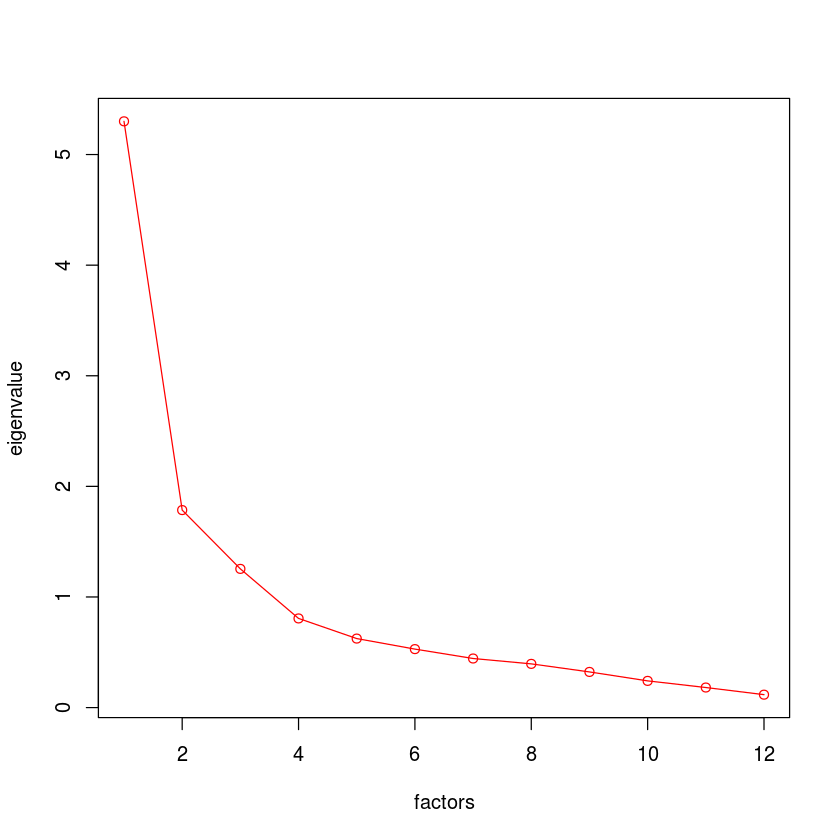

In [8]:
cat('Cattell\'s scree test, the curve is flat after 4, 3 factors are suitable\n')
plot(eigen(data)$value, type="o", col="red", xlab="factors", ylab="eigenvalue")

Parallel analysis, the intersection is between 3 and 4, 3 factors are suitable


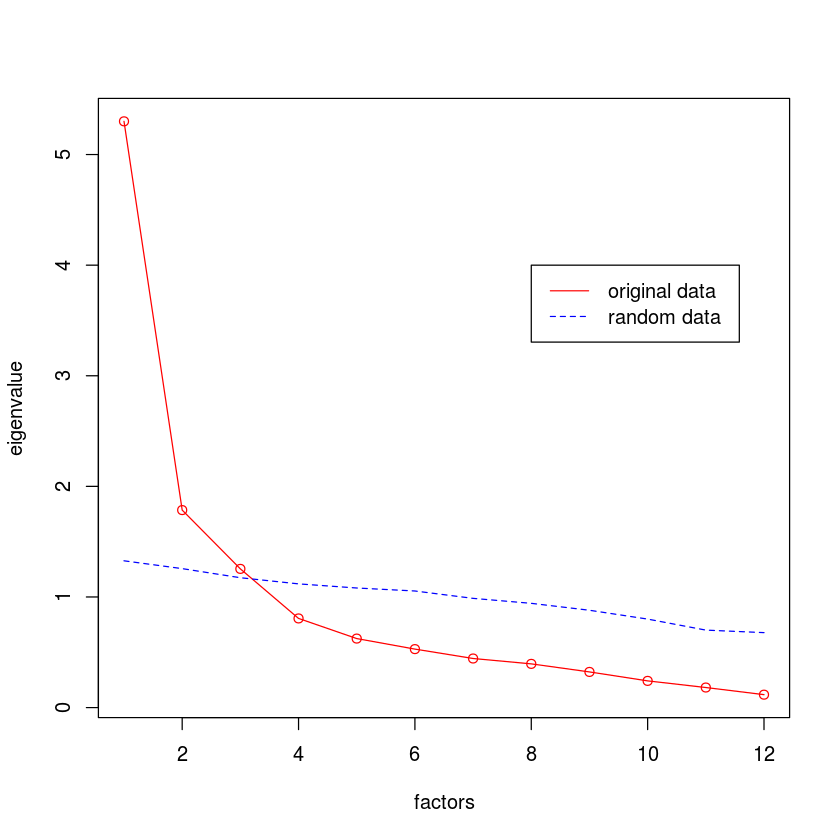

In [9]:
cat('Parallel analysis, the intersection is between 3 and 4, 3 factors are suitable\n')
plot(eigen(data)$value, type="o", col="red", xlab="factors", ylab="eigenvalue")
lines(eigen(cor(matrix(runif(3060,0,1), ncol=12)))$value, col="blue", lty=2)
legend(8, 4, legend=c("original data", "random data"), col=c("red", "blue"), lty=1:2)

In [10]:
# Varimax PC
fit_b = principal(data, nfactors=3, n.obs=nobs, residuals=TRUE, rotate='varimax', scores=TRUE)
fit_b

Principal Components Analysis
Call: principal(r = data, nfactors = 3, residuals = TRUE, rotate = "varimax", 
    n.obs = nobs, scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
    RC2  RC1  RC3   h2   u2 com
1  0.23 0.92 0.05 0.90 0.10 1.1
2  0.20 0.19 0.85 0.79 0.21 1.2
3  0.13 0.73 0.35 0.68 0.32 1.5
4  0.08 0.33 0.75 0.68 0.32 1.4
5  0.17 0.79 0.25 0.72 0.28 1.3
6  0.16 0.16 0.89 0.85 0.15 1.1
7  0.34 0.70 0.25 0.66 0.34 1.7
8  0.71 0.13 0.05 0.53 0.47 1.1
9  0.80 0.11 0.15 0.68 0.32 1.1
10 0.82 0.17 0.07 0.71 0.29 1.1
11 0.70 0.28 0.12 0.58 0.42 1.4
12 0.71 0.15 0.22 0.58 0.42 1.3

                       RC2  RC1  RC3
SS loadings           3.10 2.83 2.41
Proportion Var        0.26 0.24 0.20
Cumulative Var        0.26 0.49 0.69
Proportion Explained  0.37 0.34 0.29
Cumulative Proportion 0.37 0.71 1.00

Mean item complexity =  1.3
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RMSR) is  0.07 
 with th

# Result
RC2 : Dexterity aptitude<br>
RC1 : Eye perception aptitude<br>
RC3 : General cognitive aptitude<br>